In [1]:
import pandas as pd
import os
# läs in data (a)
path = os.path.join(os.getcwd(),"College.csv")
college = pd.read_csv(path)
#(b) Modifiera data enligt instruktionen
college2 = pd.read_csv(path, index_col= 0)
college3 = college.rename({'Unnamed: 0':'College'}, axis=1)
college3 = college3.set_index('College')
college = college3
#(c)Producera en sammanfattning
college.describe().round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

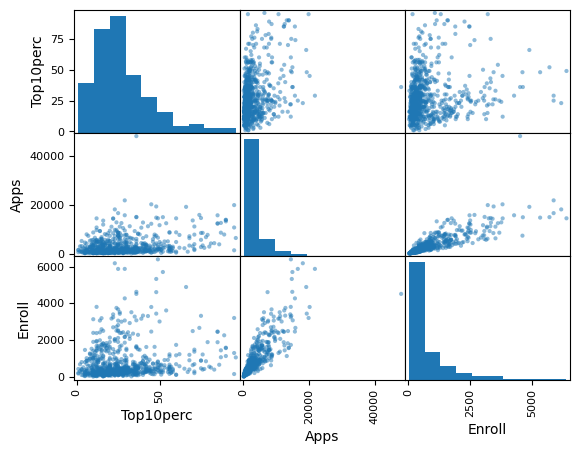

In [2]:
# (d) Plotta matrix
pd.plotting.scatter_matrix(college[["Top10perc","Apps","Enroll"]])

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

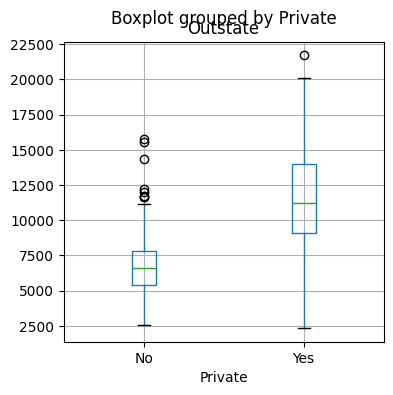

In [3]:
#e Plotta box-diagram av Outstate versus Private
college.boxplot(column="Outstate",by="Private",figsize=(4,4))

Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

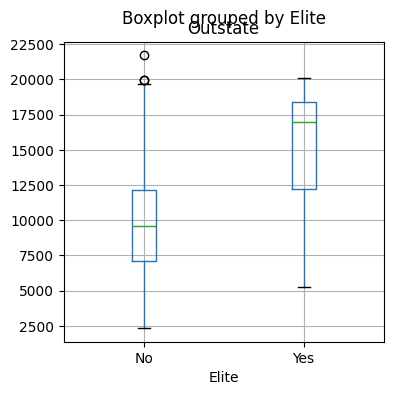

In [4]:
# f Skapa en ny kolumn 
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100], labels = ['No','Yes'])
print(college['Elite'].value_counts())
# Plotta box-diagram of  Outstate versus Elite
college.boxplot(column="Outstate",by="Elite",figsize=(4,4))

(array([ 1.,  2.,  1.,  6.,  3.,  6., 13., 16., 17., 24., 48., 61., 45.,
        60., 47., 80., 59., 49., 53., 38., 51., 23., 25., 23., 15., 10.,
         0.,  0.,  0.,  1.]),
 array([ 10. ,  13.6,  17.2,  20.8,  24.4,  28. ,  31.6,  35.2,  38.8,
         42.4,  46. ,  49.6,  53.2,  56.8,  60.4,  64. ,  67.6,  71.2,
         74.8,  78.4,  82. ,  85.6,  89.2,  92.8,  96.4, 100. , 103.6,
        107.2, 110.8, 114.4, 118. ]),
 <BarContainer object of 30 artists>)

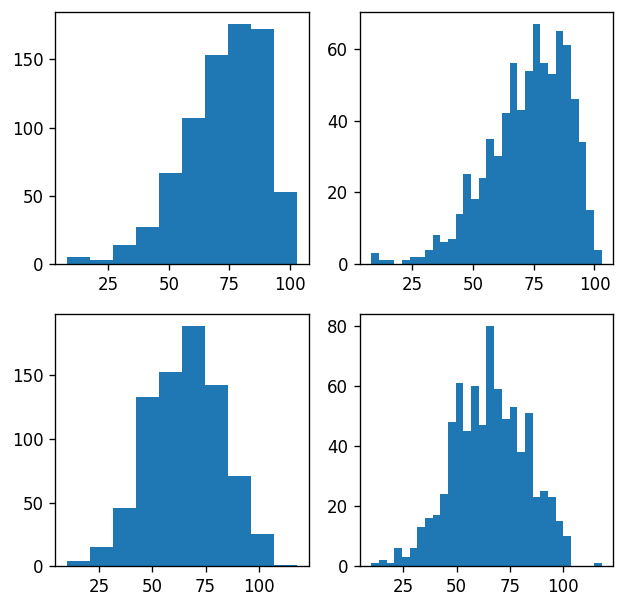

In [40]:
# g Plotta histograms av Lärarnas utbildningsnivå och examensandel
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,dpi = 120, figsize = (6,6))
ax[0,0].hist(college["PhD"], bins =10)
ax[0,1].hist(college["PhD"], bins =30)
ax[1,0].hist(college["Grad.Rate"], bins =10)
ax[1,1].hist(college["Grad.Rate"], bins =30)

array([[<Axes: xlabel='Expend', ylabel='Expend'>,
        <Axes: xlabel='Personal', ylabel='Expend'>,
        <Axes: xlabel='Grad.Rate', ylabel='Expend'>],
       [<Axes: xlabel='Expend', ylabel='Personal'>,
        <Axes: xlabel='Personal', ylabel='Personal'>,
        <Axes: xlabel='Grad.Rate', ylabel='Personal'>],
       [<Axes: xlabel='Expend', ylabel='Grad.Rate'>,
        <Axes: xlabel='Personal', ylabel='Grad.Rate'>,
        <Axes: xlabel='Grad.Rate', ylabel='Grad.Rate'>]], dtype=object)

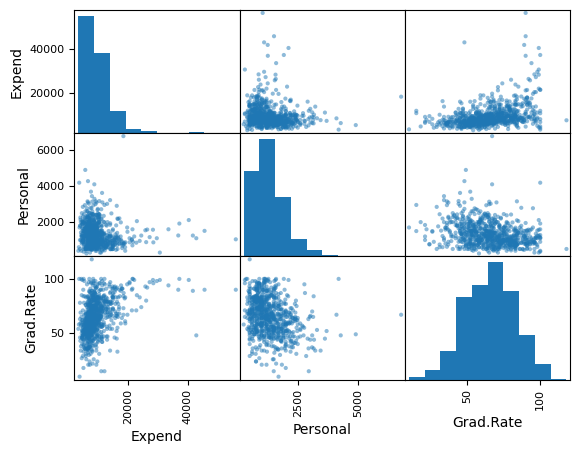

In [39]:
#h Plotta matrix 
pd.plotting.scatter_matrix(college[["Expend","Personal","Grad.Rate"]])

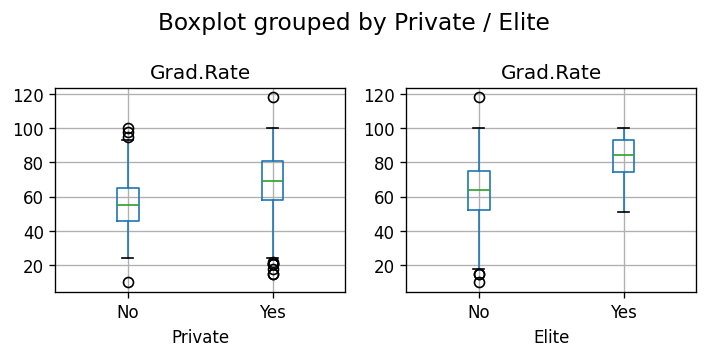

In [ ]:
# h Plotta boxplot för Grad.Rate 
fig, ax = plt.subplots(1,2,dpi = 120, figsize = (6,3))
college.boxplot(column="Grad.Rate",by="Private", ax = ax[0])
college.boxplot(column="Grad.Rate",by="Elite", ax = ax[1])
fig.suptitle('Boxplot grouped by Private / Elite', fontsize=14, y=0.98)
plt.tight_layout()

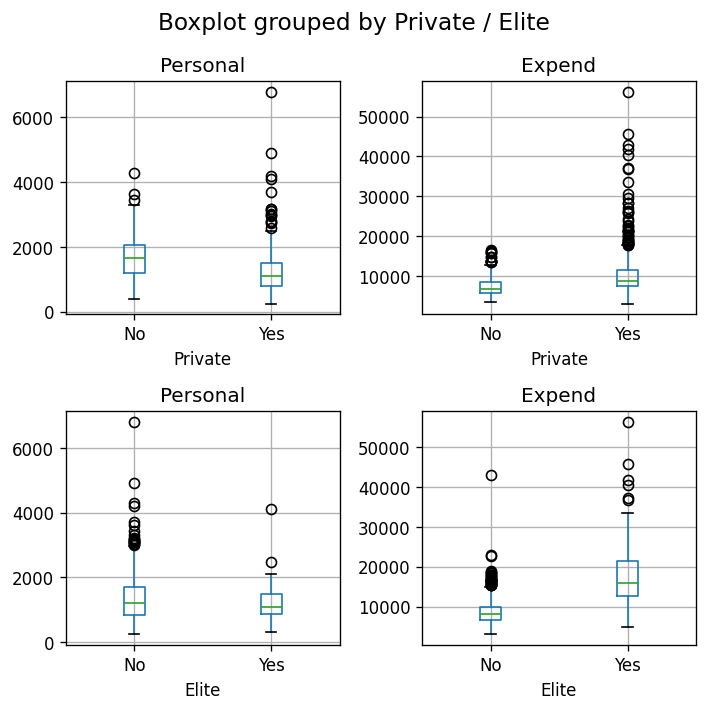

In [ ]:
# h Plotta boxplot 
fig, ax = plt.subplots(2,2,dpi = 120, figsize = (6,6))
college.boxplot(column="Personal",by="Private", ax = ax[0,0])
college.boxplot(column="Expend",by="Private", ax = ax[0,1])
college.boxplot(column="Personal",by="Elite", ax = ax[1,0])
college.boxplot(column="Expend",by="Elite", ax = ax[1,1])

fig.suptitle('Boxplot grouped by Private / Elite', fontsize=14, y=0.98)
plt.tight_layout()


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Expend', ylabel='Top10perc'>,
        <Axes: xlabel='Outstate', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Expend'>,
        <Axes: xlabel='Expend', ylabel='Expend'>,
        <Axes: xlabel='Outstate', ylabel='Expend'>],
       [<Axes: xlabel='Top10perc', ylabel='Outstate'>,
        <Axes: xlabel='Expend', ylabel='Outstate'>,
        <Axes: xlabel='Outstate', ylabel='Outstate'>]], dtype=object)

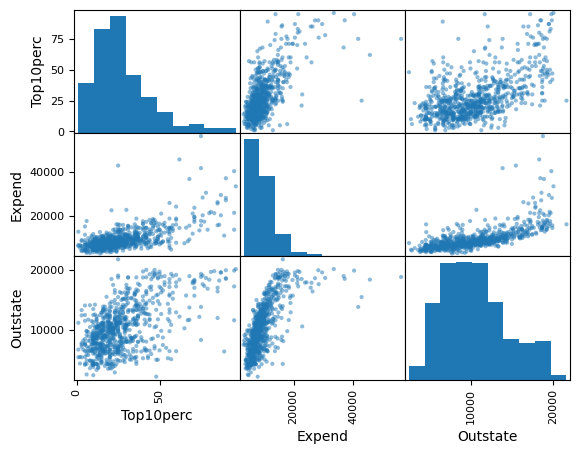

In [ ]:
#h Plotta matrix 
pd.plotting.scatter_matrix(college[["Top10perc","Expend","Outstate"]])

## Rapport – Universitet och högskolor i USA

### Inledning
Datan visar statistik över antalet ansökningar och antagningar, studenternas och lärarnas kvalitet, samt kostnader och investeringar för 777 universitet och högskolor i USA, både privata och offentliga.

Statistik över medelvärde, minsta och största värde samt median visas i tabellen nedan.
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Apps</th>
      <th>Accept</th>
      <th>Enroll</th>
      <th>Top10perc</th>
      <th>Top25perc</th>
      <th>F.Undergrad</th>
      <th>P.Undergrad</th>
      <th>Outstate</th>
      <th>Room.Board</th>
      <th>Books</th>
      <th>Personal</th>
      <th>PhD</th>
      <th>Terminal</th>
      <th>S.F.Ratio</th>
      <th>perc.alumni</th>
      <th>Expend</th>
      <th>Grad.Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.0</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
      <td>777.00</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>3001.64</td>
      <td>2018.80</td>
      <td>779.97</td>
      <td>27.56</td>
      <td>55.8</td>
      <td>3699.91</td>
      <td>855.30</td>
      <td>10440.67</td>
      <td>4357.53</td>
      <td>549.38</td>
      <td>1340.64</td>
      <td>72.66</td>
      <td>79.70</td>
      <td>14.09</td>
      <td>22.74</td>
      <td>9660.17</td>
      <td>65.46</td>
    </tr>
    <tr>
      <th>std</th>
      <td>3870.20</td>
      <td>2451.11</td>
      <td>929.18</td>
      <td>17.64</td>
      <td>19.8</td>
      <td>4850.42</td>
      <td>1522.43</td>
      <td>4023.02</td>
      <td>1096.70</td>
      <td>165.11</td>
      <td>677.07</td>
      <td>16.33</td>
      <td>14.72</td>
      <td>3.96</td>
      <td>12.39</td>
      <td>5221.77</td>
      <td>17.18</td>
    </tr>
    <tr>
      <th>min</th>
      <td>81.00</td>
      <td>72.00</td>
      <td>35.00</td>
      <td>1.00</td>
      <td>9.0</td>
      <td>139.00</td>
      <td>1.00</td>
      <td>2340.00</td>
      <td>1780.00</td>
      <td>96.00</td>
      <td>250.00</td>
      <td>8.00</td>
      <td>24.00</td>
      <td>2.50</td>
      <td>0.00</td>
      <td>3186.00</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>776.00</td>
      <td>604.00</td>
      <td>242.00</td>
      <td>15.00</td>
      <td>41.0</td>
      <td>992.00</td>
      <td>95.00</td>
      <td>7320.00</td>
      <td>3597.00</td>
      <td>470.00</td>
      <td>850.00</td>
      <td>62.00</td>
      <td>71.00</td>
      <td>11.50</td>
      <td>13.00</td>
      <td>6751.00</td>
      <td>53.00</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1558.00</td>
      <td>1110.00</td>
      <td>434.00</td>
      <td>23.00</td>
      <td>54.0</td>
      <td>1707.00</td>
      <td>353.00</td>
      <td>9990.00</td>
      <td>4200.00</td>
      <td>500.00</td>
      <td>1200.00</td>
      <td>75.00</td>
      <td>82.00</td>
      <td>13.60</td>
      <td>21.00</td>
      <td>8377.00</td>
      <td>65.00</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>3624.00</td>
      <td>2424.00</td>
      <td>902.00</td>
      <td>35.00</td>
      <td>69.0</td>
      <td>4005.00</td>
      <td>967.00</td>
      <td>12925.00</td>
      <td>5050.00</td>
      <td>600.00</td>
      <td>1700.00</td>
      <td>85.00</td>
      <td>92.00</td>
      <td>16.50</td>
      <td>31.00</td>
      <td>10830.00</td>
      <td>78.00</td>
    </tr>
    <tr>
      <th>max</th>
      <td>48094.00</td>
      <td>26330.00</td>
      <td>6392.00</td>
      <td>96.00</td>
      <td>100.0</td>
      <td>31643.00</td>
      <td>21836.00</td>
      <td>21700.00</td>
      <td>8124.00</td>
      <td>2340.00</td>
      <td>6800.00</td>
      <td>103.00</td>
      <td>100.00</td>
      <td>39.80</td>
      <td>64.00</td>
      <td>56233.00</td>
      <td>118.00</td>
    </tr>
  </tbody>
</table>
</div>

### Resultat och Analys 
#### Studentantagning och kvalitet
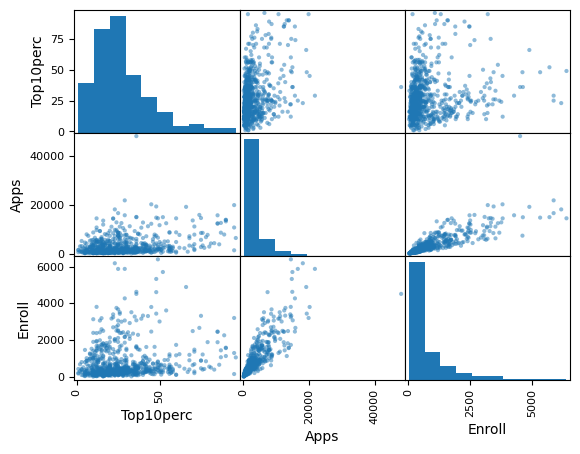

Genom histogram och spridningsdiagram för variablerna Top10perc, Apps och Enroll framgår att de flesta skolor har en låg andel studenter från de bästa 10 % av gymnasierna, med ett genomsnitt på cirka 27 %. Endast omkring 10 % av skolorna har mellan 50 % och 90 % av sina studenter från denna grupp.

Ett liknande mönster syns i antalet ansökningar och antagningar: endast ett fåtal skolor får ett mycket stort antal ansökningar och antagningar. Det finns ett tydligt samband mellan Apps (antal ansökningar) och Accept (antal antagna) – skolor som får fler ansökningar tenderar också att anta fler studenter. Detta kan delvis förklaras av att större skolor ofta får fler ansökningar.

Däremot finns inget tydligt samband mellan Top10perc och antalet ansökningar eller antagningar. Andelen studenter från de bästa 10 % verkar snarare spegla skolans kvalitet och rykte än dess storlek.

#### Översikt av undervisningsavgifter utanför delstaten
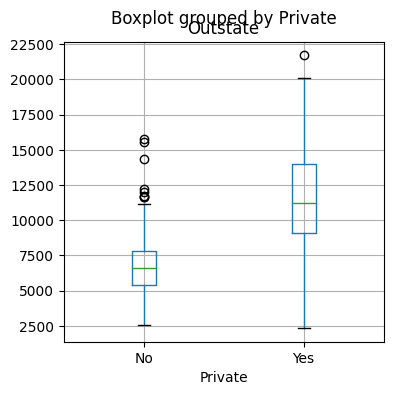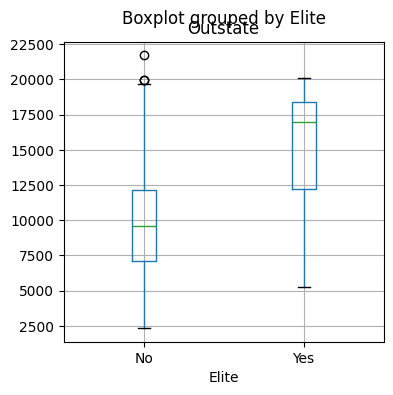

Generellt har privata skolor högre undervisningsavgifter jämfört med offentliga skolor. För offentliga skolor ligger 50 % av avgifterna mellan ca. 5 000 och 7 600 USD, medan 50 % av de privata skolorna har avgifter mellan ca. 8 500 och 13 500 USD.

De privata skolorna uppvisar dock både de lägsta och de högsta avgifterna, vilket tyder på en större variation inom denna grupp.

Skolorna har även delats in efter studenternas kvalitet. Totalt 78 skolor klassificeras som elituniversitet baserat på kriteriet att mer än 50 % av de nyantagna studenterna kommer från de 10 % bästa gymnasieskolorna. De flesta av dessa elituniversitet har högre undervisningsavgifter än övriga skolor. Däremot är skolorna med de allra högsta och lägsta avgifterna inte nödvändigtvis elituniversitet.

#### Lärarnas utbildningsnivå och examensandel
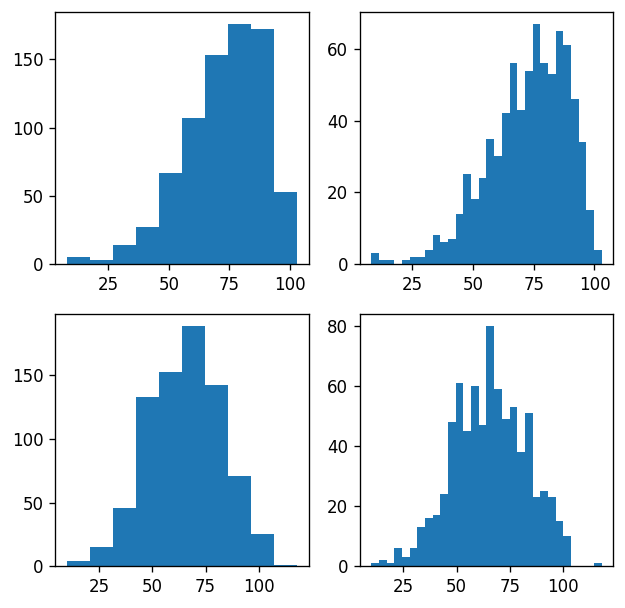

Histogrammet (med 10 klasser, bins=10) visar att de flesta skolor har över 60 % lärare med minst en doktorsexamen (Ph.D.). När det gäller lärarkvalifikationer är skillnaderna mellan skolorna relativt små, vilket tyder på en generellt hög akademisk nivå.

För examensandelen (Graduation Rate) visar fördelningen ett mönster som ligger nära en normalfördelning, vilket innebär att de flesta skolor har en måttlig examensnivå. Skolor med extremt höga eller låga examensandelar är ovanliga.

När histogrammet ritas med 30 klasser (bins=30) blir mönstret mer detaljerat. Genom att jämföra graferna med olika antal klasser kan vi bekräfta att datafördelningen är verklig och inte en visuell illusion orsakad av olämplig gruppering.

Dessutom kan man se tendenser till en multimodal fördelning, vilket innebär att det finns flera lokala toppar. Detta kan tyda på att det finns olika grupper av skolor med varierande egenskaper. Samtidigt syns vissa avvikelser – till exempel en ovanlig examensandel runt 120 %, vilket sannolikt beror på felaktig registrering eller dataproblem.

#### Samband mellan examensandel och andra variabler
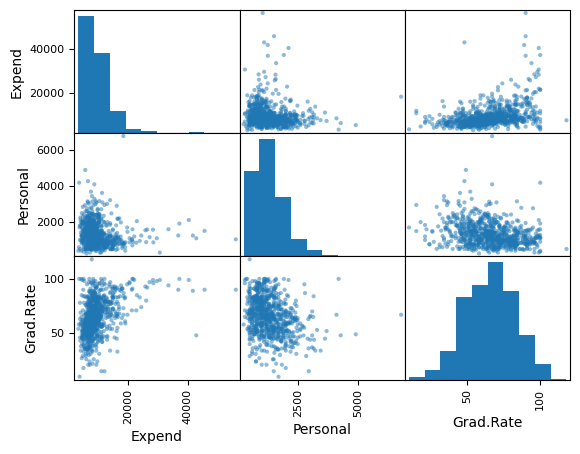 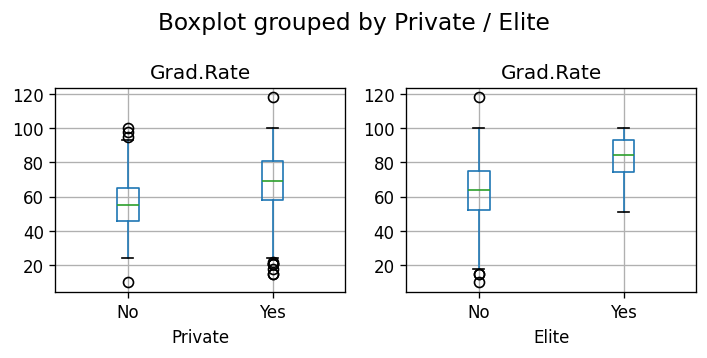

Spridningsdiagrammen mellan examensandel och kostnader (både personliga och skolrelaterade) visar inget tydligt linjärt samband. Även om det finns en svag tendens till att skolor med högre kostnader också uppvisar något högre examensgrad, är spridningen stor och punkterna ligger inte längs någon tydlig linje. Detta tyder på att högre kostnader inte nödvändigtvis leder till en högre andel examinerade studenter.

Däremot, när vi jämför privata och offentliga skolor, framgår att privata skolor generellt har något högre examensandel. Det är också tydligt att elituniversitet uppvisar en betydligt högre examensandel, med ett genomsnitt på cirka 80 %, jämfört med cirka 60 % för övriga skolor.

#### Personliga kostnader och Undervisningskostnader per elev
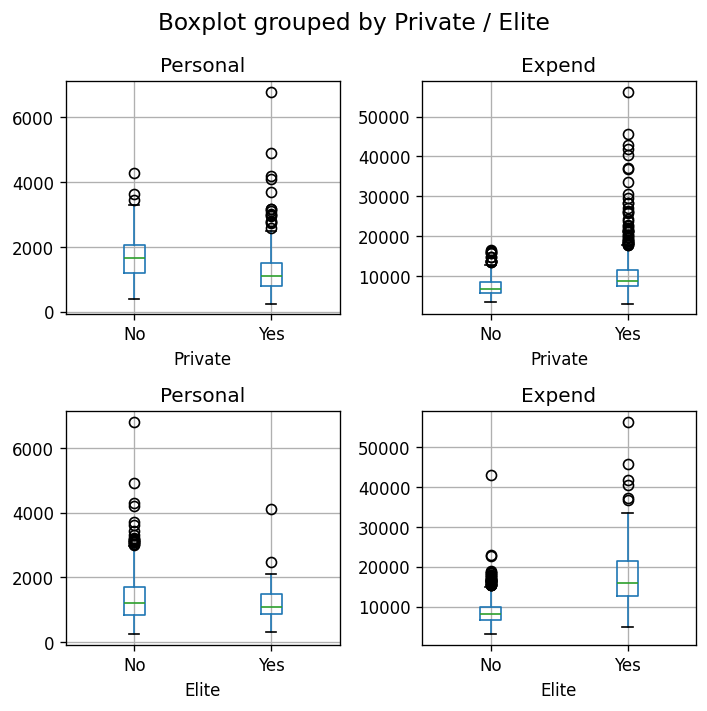

När det gäller personliga kostnader har privata skolor ett något lägre medelvärde än offentliga skolor. De offentliga skolorna tenderar att ha mer koncentrerade personliga utgifter, medan de privata skolorna uppvisar större variation och vissa extremt höga värden. De personliga kostnaderna skiljer sig inte nämnvärt mellan elituniversitet och övriga skolor.

Skillnaderna i undervisningskostnader per student (Expend) återspeglar direkt skillnader i investeringar i skolresurser och utbildningskvalitet. Privata skolor har i genomsnitt något högre undervisningskostnader än offentliga, cirka 9 000 USD jämfört med 8 000 USD. Det finns även enstaka privata skolor med extremt höga kostnader, mellan 20 000 och 50 000 USD, medan de offentliga skolorna sällan överstiger 20 000 USD.

Elituniversitet har däremot betydligt högre undervisningskostnader än övriga skolor, med ett genomsnitt på cirka 15 000 USD, jämfört med omkring 9 000 USD. Även om båda grupperna uppvisar vissa avvikande värden, tyder mönstret på att elituniversiteten satsar mer resurser per student, vilket sannolikt bidrar till deras högre utbildningskvalitet och examensandelar.


### Avslutning
Analysen av data från universitet och högskolor i USA visar tydliga skillnader mellan olika skoltyper när det gäller kostnader, studentkvalitet och examensandelar.

Privata skolor uppvisar generellt högre undervisningsavgifter jämfört med offentliga skolor. Däremot är skillnaden i undervisningskostnader per student mindre markant mellan privata och offentliga skolor. Elituniversiten har dock både högre undervisningsavgifter och högre undervisningskostnader per student, vilket kan bidra till högre kvalitet och bättre studieresultat. Detta återspeglas i att elituniversiteten har högre examensandelar, vilket tyder på ett samband mellan resurstillgång, studentkvalitet och studieresultat - även om sambandet inte är strikt linjärt.

När det gäller lärarnas kvalifikationer visar analysen att de flesta skolor har en hög andel lärare med doktorsexamen, vilket indikerar en generellt hög akademisk standard i både privata och offentliga skolor.

Sammanfattningsvis visar resultaten att elituniversiteten och de privata skolorna tenderar att uppnå högre examensandelar, sannolikt tack vare större resurstillgångar, högre studentkvalitet och starkare akademiska miljöer. Dock framgår det tydligt att höga kostnader i sig inte garanterar bättre resultat, vilket understryker vikten av effektiv resursanvändning och god utbildningskvalitet snarare än enbart finansiella satsningar. Det är värt att notera att endast cirka 10% av skolorna klassas som elituniversitet, och bland dessa kommer 50-90% av studenterna från topp 10-gymnasier.